# Introduction to Data Science
## Homework 5

Student Name: Rafael Garcia Cano da Costa

Student Netid: rgc292

### Part 1: Critique this plan
1\. After a few beers your CIO invited his buddy from Blue Moon consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Blue Moon, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Blue Moon says about the characteristics of your service is accurate.

Based on what we have covered in class and in the book, identify the four most serious weaknesses/flaws in this abridged version of Blue Moon's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Blue Moon Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Blue Moon) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

* First, the use of a dataset containing current new customers for training the model has a higher probability of just addressing a narrowed niche of potential new customers, and this could result in less new customers than possible when applying a targeted campaign. This can be handled if the predictive model is built on a more generalized dataset containing all companys' current customers.
* Second, relying on interpretation of coefficients to infer how significant attributes are is not the best approach. The use of regularization can offer a better aftermath for maybe not being the current new customers' dataset as huge as necessary to control variance and having high dimensionality among its feature since the word of mouth tend to cluster users with similar profiles.
* Third, assuming that LR is the best choice per se can be a mistake for not camparing its performance against other models' performance. In order to maximize the targeted campaign's effectiveness, it is worth a comparison among different models' performance scores as a means to find out which one is the best for using.
* Finally, applying the targeted offer to new consumers based on a dataset of subscribers garnered through word of mouth can be a mistake, because the profile of current new customers influenced by word of mouth can not be responsive to the intended targeted offer. This can be addressed through insertion of new attributes beyond demographics and usage to both considered datasets aiming to diminish the uncertainty with regards to the effectiveness of the targeted offer.



### Part 2: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Laplace smoothing can be applied to avoid overfitting. An important situation occurs when the training dataset has no presence of an specific word when dealing with a bag of words model. This could lead to setting probability zero to a word as being impossible to occur when deploying a model. The Laplace smoothing allow setting probability higher than zero when a word does not appear on the training dataset. This still give a chance of observing the specific word when deploying the model.

### Part 3: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [36]:
import pandas as pd
data = pd.read_csv('imdb.csv', quotechar = "'", escapechar = "\\")

2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [37]:
import numpy as np
data.Class = np.where(data.Class == 'P', 1, 0)


3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [38]:
from sklearn.cross_validation import train_test_split

X = pd.DataFrame(data['Text'])
Y = pd.DataFrame(data['Class'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = .75)

In [39]:
merged_xtest_ytest = pd.merge(pd.DataFrame(X_test), pd.DataFrame(Y_test), how='inner', left_index=True, right_index=True)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

X_train = X_train.unstack()
X_test = X_test.unstack()

words = stopwords.words('english')
binary_vectorizer = CountVectorizer(stop_words = words, analyzer = 'word', ngram_range = (1,2), binary = True)
binary_vectorizer.fit(X_train)

X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words = words, analyzer = 'word', ngram_range = (1,2), binary = False)
tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

In [45]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

Y_train = Y_train.unstack()
Y_test = Y_test.unstack()

lr_binary = LogisticRegression()
lr_binary.fit(X_train_binary, Y_train)

lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, Y_train)

bernou_binary = BernoulliNB()
bernou_binary.fit(X_train_binary, Y_train)

bernou_tfidf = BernoulliNB()
bernou_tfidf.fit(X_train_tfidf, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

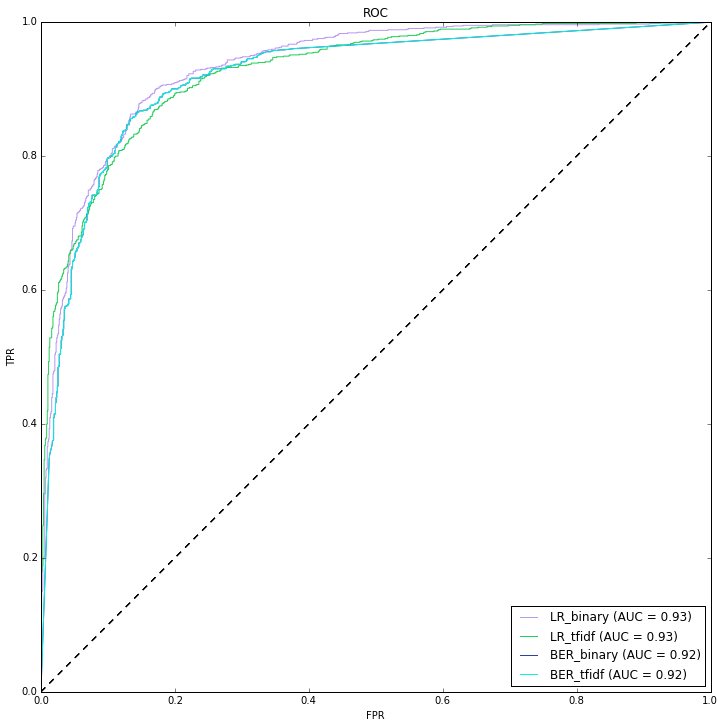

In [47]:
from sklearn.metrics import roc_curve, auc
#auc_sc = auc(fpr,tpr)
#print auc_sc
tprs = []
fprs = []
roc_labels = []
np.random.seed(36)

def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
plotAUC(Y_test, lr_binary.predict_proba(X_test_binary)[:,1], 'LR_binary')
plotAUC(Y_test, lr_tfidf.predict_proba(X_test_tfidf)[:,1], 'LR_tfidf')
plotAUC(Y_test, bernou_binary.predict_proba(X_test_binary)[:,1], 'BER_binary')
plotAUC(Y_test, bernou_tfidf.predict_proba(X_test_tfidf)[:,1], 'BER_tfidf') 
plt.show()

LR_binary presents an overall higher AUC, but the other models have similar performance. However, if the priority is the TPR over FPR, the LR_tfidf has higher performance up to TPR = .60 in case of a rank problem.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. List the text below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [48]:
lr_binary = LogisticRegression()
lr_binary.fit(X_train_binary, Y_train)
merged_xtest_ytest['Prediction'] = lr_binary.predict_proba(X_test_binary)[:,1]
merged_xtest_ytest['Prediction_binary'] = np.where(merged_xtest_ytest['Prediction'] > .5, 1, 0)

In [50]:
merged_xtest_ytest

,Text,Class,Prediction,Prediction_binary
3895,I had the privilege of watching Scarface on th...,1,0.999803,1
5770,This film was a big disappointment. I take the...,0,0.406635,0
1166,When they killed off John Amoss character they...,0,0.126756,0
3322,Trawling through the Sci Fi weeklies section o...,1,0.969174,1
3004,Ive just visited Russian forum of our TV-chann...,0,0.841699,1
4373,I have seen bad films but this took the p***. ...,0,0.030272,0
7425,My wife and I really had high hopes for this f...,0,0.004736,0
2998,First off lets start with the negative points:...,1,0.966767,1
1231,First let me just comment on what I liked abou...,0,0.001231,0
6411,Now I love Bela Lugosidont get me wronghe is o...,0,0.012820,0


In [51]:
merged_xtest_ytest['mismatch'] = np.where(merged_xtest_ytest['Class'] != merged_xtest_ytest['Prediction_binary'] , 1, 0)

In [53]:
merged_xtest_ytest

,Text,Class,Prediction,Prediction_binary,mismatch
3895,I had the privilege of watching Scarface on th...,1,0.999803,1,0
5770,This film was a big disappointment. I take the...,0,0.406635,0,0
1166,When they killed off John Amoss character they...,0,0.126756,0,0
3322,Trawling through the Sci Fi weeklies section o...,1,0.969174,1,0
3004,Ive just visited Russian forum of our TV-chann...,0,0.841699,1,1
4373,I have seen bad films but this took the p***. ...,0,0.030272,0,0
7425,My wife and I really had high hopes for this f...,0,0.004736,0,0
2998,First off lets start with the negative points:...,1,0.966767,1,0
1231,First let me just comment on what I liked abou...,0,0.001231,0,0
6411,Now I love Bela Lugosidont get me wronghe is o...,0,0.012820,0,0


In [54]:
merged_xtest_ytest[merged_xtest_ytest['mismatch'] == 1]

,Text,Class,Prediction,Prediction_binary,mismatch
3004,Ive just visited Russian forum of our TV-chann...,0,0.841699,1,1
6633,CQ could have been good campy fun. But it comm...,0,0.517351,1,1
7937,The summer of 1979 when this flick was a stapl...,0,0.921330,1,1
3209,I have just watched the movie for the first ti...,0,0.748915,1,1
6385,Ive seen this film several times in a variety ...,0,0.908897,1,1
6239,WOW! What - a - movie !!!!!!!!!!! Im not at al...,1,0.281740,0,1
7428,i say the domino principle is an enormously un...,1,0.307682,0,1
3723,As a fan of looking further into the phenomeno...,1,0.225596,0,1
5960,Charles Bronson stars as Lt Crowe a police det...,0,0.819151,1,1
5250,Imagine that in adapting a James Bond novel in...,0,0.541532,1,1


	Text	Class	Prediction	Prediction_binary	mismatch
3004	Ive just visited Russian forum of our TV-chann...	0	0.841699	1	1
6633	CQ could have been good campy fun. But it comm...	0	0.517351	1	1
7937	The summer of 1979 when this flick was a stapl...	0	0.921330	1	1
3209	I have just watched the movie for the first ti...	0	0.748915	1	1
6385	Ive seen this film several times in a variety ...	0	0.908897	1	1
6239	WOW! What - a - movie !!!!!!!!!!! Im not at al...	1	0.281740	0	1
7428	i say the domino principle is an enormously un...	1	0.307682	0	1
3723	As a fan of looking further into the phenomeno...	1	0.225596	0	1
5960	Charles Bronson stars as Lt Crowe a police det...	0	0.819151	1	1
5250	Imagine that in adapting a James Bond novel in...	0	0.541532	1	1
5633	Ever since I was eight years old I have been a...	0	0.640470	1	1
6172	its movies like these that make you wish that ...	1	0.115167	0	1
8451	Watching Der himmel über Berlin as a teen in t...	0	0.953681	1	1
3929	The trouble with the book Memoirs of a Geisha ...	0	0.576290	1	1
1161	Many people here say that this show is for kid...	0	0.762975	1	1
7155	How wonderful. Yet another movie about America...	0	0.777960	1	1
969	I was one of those few Americans that grew up ...	0	0.531514	1	1
6484	Rating: 4 out of 10 As this mini-series approa...	0	0.749809	1	1
8140	This movie was the most out of line and libera...	0	0.606629	1	1
793	Ive heard people who say this movie is dull du...	1	0.387134	0	1
2751    Say what you will about schmaltz. One beauty...     1   0.103725    0   1

In [62]:
merged_xtest_ytest.Text[6239]

'WOW! What - a - movie !!!!!!!!!!! Im not at all a fan of contemporary Italian directors. Usually I dont like dramas. I am not a Will Smith super fan even thinking that he is a very good actor......but this movie ! It is such a great movie with a such original script and so good direction and so well acting...wow...it is stunning. This movie captured my attention minute by minute and I even did not like The pursuit of happiness (maybe also because i did not like the acting of Wills son who is a very bad actor while children usually seems all natural born actors I saw him also last night in The day the earth stood still and I confirmed my sensation that Jaden cant act). I dont want to write spoilers and so i dont talk about the story but what I can say is that this movie talks about Love Death and other feelings which i dont like to watch in movies....but THIS MOVIE is such a super great movie. If you have a minimum of heart youll dont regret watching it'

'WOW! What - a - movie !!!!!!!!!!! Im not at all a fan of contemporary Italian directors. Usually I dont like dramas. I am not a Will Smith super fan even thinking that he is a very good actor......but this movie ! It is such a great movie with a such original script and so good direction and so well acting...wow...it is stunning. This movie captured my attention minute by minute and I even did not like The pursuit of happiness (maybe also because i did not like the acting of Wills son who is a very bad actor while children usually seems all natural born actors I saw him also last night in The day the earth stood still and I confirmed my sensation that Jaden cant act). I dont want to write spoilers and so i dont talk about the story but what I can say is that this movie talks about Love Death and other feelings which i dont like to watch in movies....but THIS MOVIE is such a super great movie. If you have a minimum of heart youll dont regret watching it'

* 6239- This review was misclassified as negative because the reviewer uses negative comments to express that even though he does not like aspects related to style and actors on the movie, he really liked the movie.   

In [58]:
merged_xtest_ytest.Text[2751]

'Say what you will about schmaltz. One beauty of this film is that it is not pro-American. It is a morality about some Americans being called to high purpose and how they rose to the occasion. It is inspiring because it is about people of noble purpose. To me the most interesting part of the film is the education of Fanny and David Farrelly (Bette Davis mother and brother). As Fanny says Weve been shaken out of the magnolias. In todays political climate where led by a president who shamelessly lied to us and used 9/11 to bring out the absolute worst characteristics of human beings we sunk to the level of the 9/11 murderers to seek blood-thirsty vengeance. It cant all be blamed on Mr. Bush - after all we allowed him to lead us in that direction and even re-elected him after his lies had been exposed. Now with complete justification we Americans are reviled throughout the world. Today we watch this film with a new awareness: That the rise to power of Nazis in Germany was not due to a fla

'Say what you will about schmaltz. One beauty of this film is that it is not pro-American. It is a morality about some Americans being called to high purpose and how they rose to the occasion. It is inspiring because it is about people of noble purpose. To me the most interesting part of the film is the education of Fanny and David Farrelly (Bette Davis mother and brother). As Fanny says Weve been shaken out of the magnolias. In todays political climate where led by a president who shamelessly lied to us and used 9/11 to bring out the absolute worst characteristics of human beings we sunk to the level of the 9/11 murderers to seek blood-thirsty vengeance. It cant all be blamed on Mr. Bush - after all we allowed him to lead us in that direction and even re-elected him after his lies had been exposed. Now with complete justification we Americans are reviled throughout the world. Today we watch this film with a new awareness: That the rise to power of Nazis in Germany was not due to a flaw in the German character but a flaw in human beings that allows us to rationalize anything that will justify our committing immoral and heinous acts. Im not comparing George Bush to Adolph Hitler. But I am pointing out how a leader can whip us up into a frenzy of terror hatred and hyper-nationalism to do despicable things. Sadly the blackmailer who will do whatever needs to be done for his own agrandizement no matter how immoral is most like the leaders of our country those who support them and those who have buried their heads so deep in the sand that they cant even be bothered to vote. A film like Watch on the Rhine reminds us of what we once aspired to be - a force for the betterment of humanity - and that we have it in us to once again aspire to lofty goals. Geoff'

* 2751- This review was wrongly classified as negative because the reviewer express many times his negative personal opinion  about aspects of real life as well as make good comments about the movie. As a result, there are a lot of negative words, but they are not used to criticize the movie.

In [63]:
merged_xtest_ytest.Text[7428]

'i say the domino principle is an enormously underappreciated film.anyone who has taken the time to investigate our contemporary history of conspiracies;jfk rfk mlkg.wallace and in fact numerous others can only draw the conclusion that the author of the domino principle really knew what he was talking about.roy tucker could be lee harvey oswald or james earl ray or sirhan sirhan or arthur bremer maybe even john hinkley or timothy mcveigh.to mention a few.the conspiracy scenario involving spies big business and political assassinations is not really a fiction but an ominous part of our convoluted existential history.god help usbut the domino principle is more fact than fantasy.if this causes a little loss of sleep maybe it should.dont take my word for itinvestigate for yourselves.'

'i say the domino principle is an enormously underappreciated film.anyone who has taken the time to investigate our contemporary history of conspiracies;jfk rfk mlkg.wallace and in fact numerous others can only draw the conclusion that the author of the domino principle really knew what he was talking about.roy tucker could be lee harvey oswald or james earl ray or sirhan sirhan or arthur bremer maybe even john hinkley or timothy mcveigh.to mention a few.the conspiracy scenario involving spies big business and political assassinations is not really a fiction but an ominous part of our convoluted existential history.god help usbut the domino principle is more fact than fantasy.if this causes a little loss of sleep maybe it should.dont take my word for itinvestigate for yourselves.'

* 7428- This review was misclassified as negative because the reviewer make comments using negative words to say that the movie was not appreciated as it should have been. Also, the use of 'not' a good opinion about the movie probably mislead the classification.

In [66]:
merged_xtest_ytest.Text[6172]

'its movies like these that make you wish that you never picked on the nerd growing up in school. If you liked this movie then I would suggest you watch Valentine. I just found out today that the guy who played Marty(Simon) killed himself a little after the movie was released which is a shame since he did a good job. I wonder if its because of the part he played in the movie. It starts out when Carol tricks him into going into the girls restroom to act like they were about to do it. When he was changing in the showers Carols popular friends snuck into the bathroom and got everything ready camera electric shock pole. When Marty open the curtain butt naked he realized that he was tricked. He tries to cover the shower up but the kids open it grab Marty and starts being mean to him while the camera is rolling. They picked him up dunked his head in the toliet while it was being flushed and they electricuted him(slightly). When the kids are in detention given by the coach 2 of the boys give 

'its movies like these that make you wish that you never picked on the nerd growing up in school. If you liked this movie then I would suggest you watch Valentine. I just found out today that the guy who played Marty(Simon) killed himself a little after the movie was released which is a shame since he did a good job. I wonder if its because of the part he played in the movie. It starts out when Carol tricks him into going into the girls restroom to act like they were about to do it. When he was changing in the showers Carols popular friends snuck into the bathroom and got everything ready camera electric shock pole. When Marty open the curtain butt naked he realized that he was tricked. He tries to cover the shower up but the kids open it grab Marty and starts being mean to him while the camera is rolling. They picked him up dunked his head in the toliet while it was being flushed and they electricuted him(slightly). When the kids are in detention given by the coach 2 of the boys give Marty a joint that will make him throw up. Skip breaks one of the glass windows in the gym using a brick to get the teacher to excuse him. While Marty is puking in the bathroom Skip sneaks into the Science Lab and mixes some stuff that looks like cocaine but not sure what it was. The lab blows up disfiguring him badly. 5 years later the kids who tormented him that day got invitations for a 5 year school reunion at the old school which was burn that day it exploded. One by one the people get killed off. I dont understand how the girl who drowned really drowned. she could have gotten back up after Marty left. She almost got out the first time.'

* 6172- This review was wrongly classified as negative because the reviewer uses negative words like 'shame' to comment on something not related to the quality of the movie. Also, he describes enthusiasticaly many scenes which needs negative words to detail the facts like 'badly'.

In [68]:
merged_xtest_ytest.Text[793]

'Ive heard people who say this movie is dull dull dull. I dont think they were watching the right movie. This isnt the prototypical action movie thank God. This is a psychological drama about the rookie and his mentor that just happens to be about killing people. In this way it works extremely well with terrific performances from Berenger and Zane (who doesnt sleepwalk through the movie like he has in other roles - he actually looks like hes acting). I was disappointed with the action towards the end - a lot of it didnt make much sense and was unsatisfying given the buildup from the rest of the movie. But watch Zanes face as he panics alone while Berenger does the dirty work.'

'Ive heard people who say this movie is dull dull dull. I dont think they were watching the right movie. This isnt the prototypical action movie thank God. This is a psychological drama about the rookie and his mentor that just happens to be about killing people. In this way it works extremely well with terrific performances from Berenger and Zane (who doesnt sleepwalk through the movie like he has in other roles - he actually looks like hes acting). I was disappointed with the action towards the end - a lot of it didnt make much sense and was unsatisfying given the buildup from the rest of the movie. But watch Zanes face as he panics alone while Berenger does the dirty work.'

* 793- This review was misclassified as negative because the reviewer talks about someone's criticism on the movie using the same negative word three times, which probably gave more weight towards a negative prediction. 